In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# 함수 f(z)를 구현
def f(z):
    return np.power(z,2)-1
print(f(0))

-1


In [23]:
z=[4, 1-0.2j, 1.6]
print(f(z))

[15.  +0.j  -0.04-0.4j  1.56+0.j ]


In [31]:
x, y=np.meshgrid(np.linspace(-10, 10, 20), np.linspace(-10, 10, 20))
mesh=y*1j+x

In [32]:
output=np.abs(f(mesh))

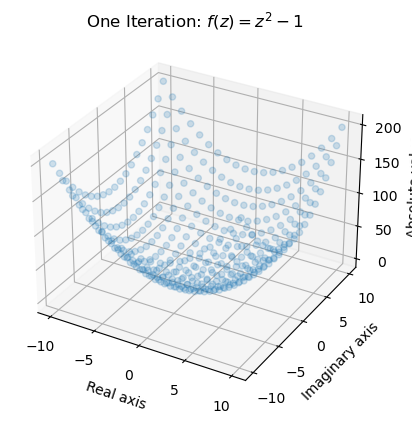

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')      # 실수부
ax.set_ylabel('Imaginary axis') # 허수부
ax.set_zlabel('Absolute value') # 함수값의 절대값
ax.set_title('One Iteration: $f(z) = z^2 - 1$');

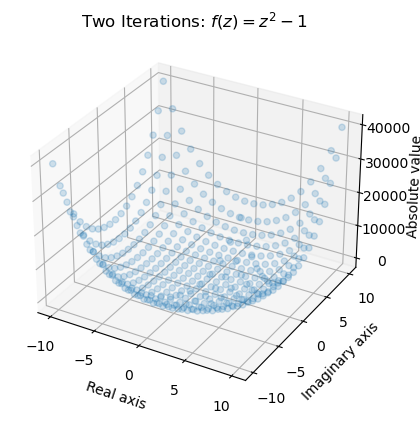

In [34]:
output = np.abs(f(f(mesh)))

ax = plt.axes(projection='3d')

ax.scatter(x, y, output, alpha=0.2)

ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')
ax.set_zlabel('Absolute value')
ax.set_title('Two Iterations: $ f(z) = z^2 - 1$');

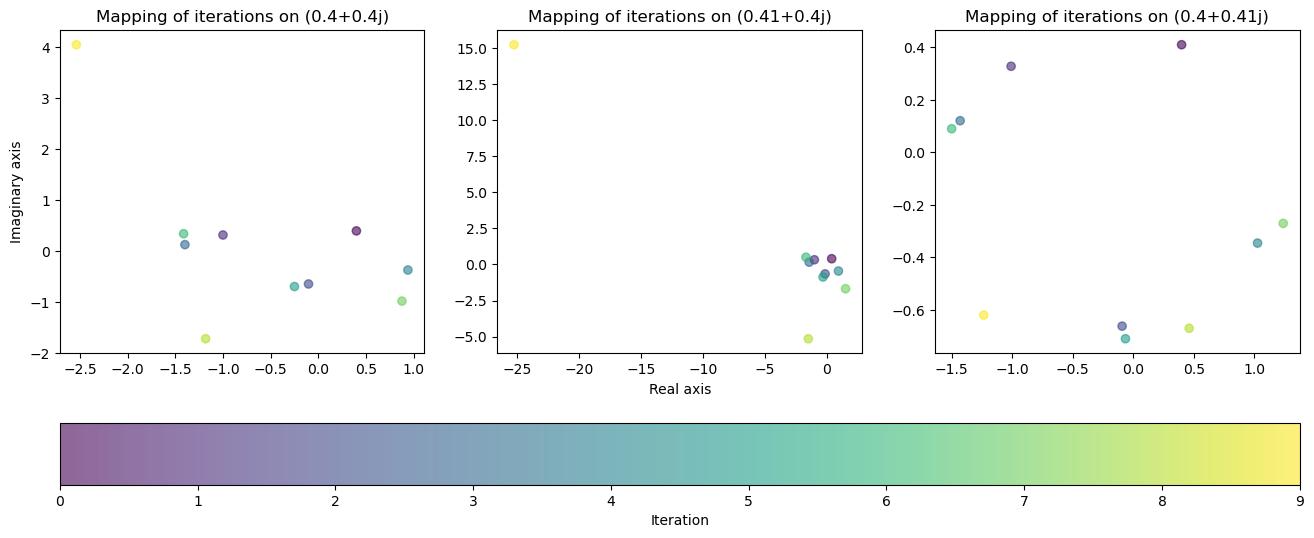

In [35]:
selected_values = np.array([0.4 + 0.4j, 0.41 + 0.4j, 0.4 + 0.41j])
num_iter = 9

outputs = np.zeros(
    (num_iter+1, selected_values.shape[0]),  # 10X3 Zero 배열 생성
    dtype=complex  # 데이터 타입: 복소수
)
outputs[0] = selected_values   # 함수 초기 조건

for i in range(num_iter):
    outputs[i+1] = f(outputs[i])  # 10번 함수 반복하는 동안 각 결과를 저장

fig, axes = plt.subplots(1, selected_values.shape[0], figsize=(16, 6))
axes[1].set_xlabel('Real axis')
axes[0].set_ylabel('Imaginary axis')

for ax, data in zip(axes, outputs.T):
    cycle = ax.scatter(
        data.real,  # 실수부
        data.imag,  # 허수부
        c=range(data.shape[0]), 
        alpha=0.6
    )
    ax.set_title(f'Mapping of iterations on {data[0]}')

fig.colorbar(cycle, ax=axes, location='bottom', label='Iteration');

In [40]:
def divergence_rate(mesh, num_iter=10, radius=2):

    z = mesh.copy()
    # 값 별 반복 횟수를 저장
    diverge_len = np.zeros(mesh.shape)

    # 발산되지 않은 값들에 대해 함수를 반복 적용
    for i in range(num_iter):
        # [+] 1. Boolean 배열  마스크 생성
        conv_mask=np.abs(z)<radius

        # [+] 2. 해당 값들에 대한 diverge_len 값 증가
        diverge_len[conv_mask]+=1

        # [+] 3. 해당 값들에 대해 함수 적용
        z[conv_mask]=z[conv_mask]**2-1

    return diverge_len

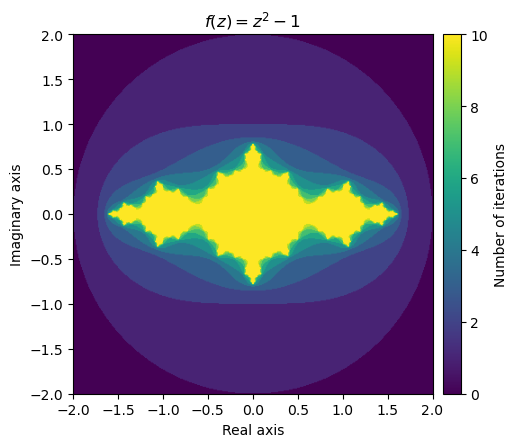

In [41]:
x, y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
mesh = x + (1j * y)

output = divergence_rate(mesh)

fig = plt.figure(figsize=(5, 5))
ax = plt.axes()

ax.set_title('$f(z) = z^2-1$')
ax.set_xlabel('Real axis')
ax.set_ylabel('Imaginary axis')

im = ax.imshow(output, extent=[-2, 2, -2, 2])
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
plt.colorbar(im, cax=cax, label='Number of iterations');